In [28]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [29]:
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ML : Loan classification Prediction/Loan_Approval_Data.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


# EDA

In [30]:
# Checking datatype
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
# Checking NULL values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
# Seperating categorical and continous columns
df=pd.DataFrame({})
for i in data.columns:
  if (len(data[i].unique()) < 12):
    df=df.append({
        'type':'Categorical',
        'column':i,
        'count(unique values)':len(data[i].unique()),
        'unique values':list(data[i].unique()),
        'count(null values)':data[i].isnull().sum(),
        '% of null values':round(data[i].isnull().sum()/614,2),
        'datatype':data[i].dtype
    }, ignore_index=True)

for i in data.columns:
  if (len(data[i].unique()) > 12):
    df=df.append({
        'type':'Continous',
        'column':i,
        'count(unique values)':len(data[i].unique()),
        'unique values':'',
        'count(null values)':data[i].isnull().sum(),
        '% of null values':round(data[i].isnull().sum()/614,2),
        'datatype':data[i].dtype
    }, ignore_index=True)

display(df)

,type,column,count(unique values),unique values,count(null values),% of null values,datatype
0,Categorical,Gender,3.00,"[Male, Female, nan]",13.00,0.02,object
1,Categorical,Married,3.00,"[No, Yes, nan]",3.00,0.00,object
2,Categorical,Dependents,5.00,"[0, 1, 2, 3+, nan]",15.00,0.02,object
3,Categorical,Education,2.00,"[Graduate, Not Graduate]",0.00,0.00,object
4,Categorical,Self_Employed,3.00,"[No, Yes, nan]",32.00,0.05,object
5,Categorical,Loan_Amount_Term,11.00,"[360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0,...",14.00,0.02,float64
6,Categorical,Credit_History,3.00,"[1.0, 0.0, nan]",50.00,0.08,float64
7,Categorical,Property_Area,3.00,"[Urban, Rural, Semiurban]",0.00,0.00,object
8,Categorical,Loan_Status,2.00,"[Y, N]",0.00,0.00,object
9,Continous,Loan_ID,614.00,,0.00,0.00,object


# Removing NULL Values

In [33]:
# columns having null values
for i in data.columns:
  if (data[i].isnull().sum() > 0):
    print(i)

Gender
Married
Dependents
Self_Employed
LoanAmount
Loan_Amount_Term
Credit_History


In [34]:
data1=data.copy()
data2=data.copy()

# Since % of null value is less than 5% in each column, so we could drop null values

# Type 1 : Dropping NULL values
data1.dropna(inplace=True)
data1.reset_index(inplace=True)
data1=data1.drop(['index'], axis=1)

# Type 2 : Replacing NULL values with mode
for i in data2.columns:
  if (data2[i].isnull().sum() > 0):
    data2[i].fillna(data2[i].mode()[0], inplace=True)

In [35]:
# Validation
print(data.isnull().sum())
print(data1.isnull().sum())
print(data2.isnull().sum())

display(data[data['Gender'].isnull()==True].head(5))
display(data2[data['Gender'].isnull()==True].head(5))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.00,112.00,360.00,0.00,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.00,370.00,360.00,1.00,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.00,700.00,300.00,1.00,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.00,168.00,360.00,1.00,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.00,159.00,360.00,1.00,Rural,N


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,Male,Yes,2,Not Graduate,No,3365,1917.00,112.00,360.00,0.00,Rural,N
126,LP001448,Male,Yes,3+,Graduate,No,23803,0.00,370.00,360.00,1.00,Rural,Y
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.00,700.00,300.00,1.00,Urban,Y
188,LP001644,Male,Yes,0,Graduate,Yes,674,5296.00,168.00,360.00,1.00,Rural,Y
314,LP002024,Male,Yes,0,Graduate,No,2473,1843.00,159.00,360.00,1.00,Rural,N


# Outliers detection

ApplicantIncome         AxesSubplot(0.125,0.125;0.133621x0.755)
CoapplicantIncome    AxesSubplot(0.285345,0.125;0.133621x0.755)
LoanAmount            AxesSubplot(0.44569,0.125;0.133621x0.755)
Loan_Amount_Term     AxesSubplot(0.606034,0.125;0.133621x0.755)
Credit_History       AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

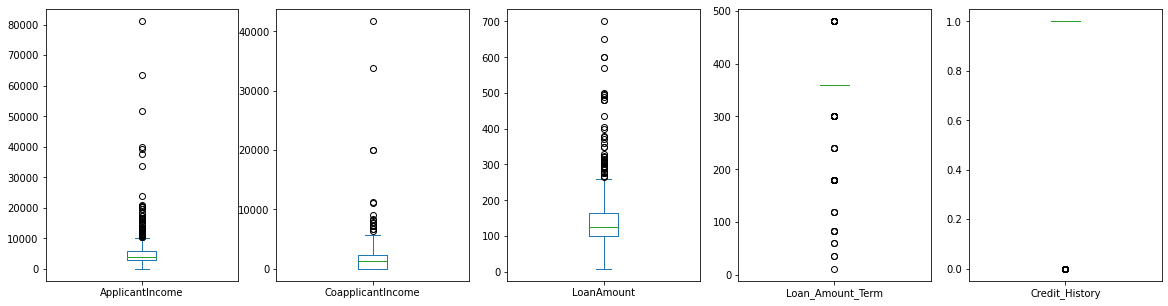

In [36]:
data2.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

Applicant Income can be anything between 0 to infinity. So, discarding this.

CoApplicant Income can be anything between 0 to infinity. So, discarding this.

Loan Amount can be anything 0 to infinity. So, discarding this.

Checking for Loan Amount Term. 
* How can someone's loan have a period of 0 ?
* Whats so special that load period is 500 ?

In [37]:
# Loan Amount Term
display(data2[data2['Loan_Amount_Term']>400].head(3))
# so, loan amount term of 480 means 480 days. so this is a valid scenario.

display(data2[data2['Loan_Amount_Term']<100].head(3))
# so, we dont have anything where loan amount term is 0. so this is a valid scenario.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
75,LP001255,Male,No,0,Graduate,No,3750,0.00,113.00,480.00,1.00,Urban,N
109,LP001384,Male,Yes,3+,Not Graduate,No,2071,754.00,94.00,480.00,1.00,Semiurban,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.00,650.00,480.00,1.00,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.00,125.00,60.00,1.00,Urban,Y
242,LP001806,Male,No,0,Graduate,No,2965,5701.00,155.00,60.00,1.00,Urban,Y
262,LP001870,Female,No,1,Graduate,No,3481,0.00,155.00,36.00,1.00,Semiurban,N


In [38]:
# Applicant income
print(data2['ApplicantIncome'].describe())
# so, max applicant income is 81000.00

# CoApplicant income
print(data2['CoapplicantIncome'].describe())
# so, Coapplicant Income can be 0 as well

# these are valid scenarios

count     614.00
mean     5403.46
std      6109.04
min       150.00
25%      2877.50
50%      3812.50
75%      5795.00
max     81000.00
Name: ApplicantIncome, dtype: float64
count     614.00
mean     1621.25
std      2926.25
min         0.00
25%         0.00
50%      1188.50
75%      2297.25
max     41667.00
Name: CoapplicantIncome, dtype: float64


 # Feature Selection

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Loan_Status'>

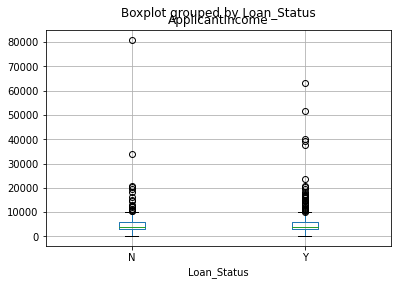

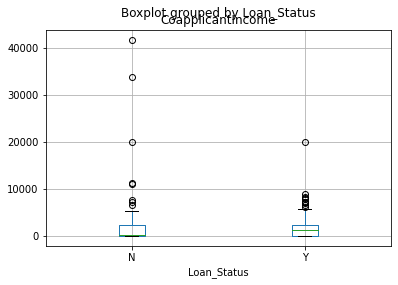

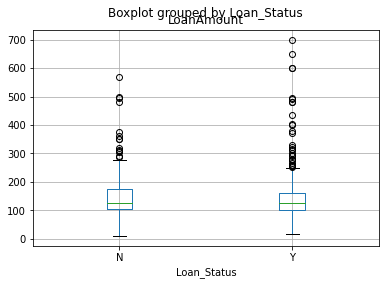

In [39]:
# Continous vs Categorical
data2.boxplot('ApplicantIncome', 'Loan_Status')
data2.boxplot('CoapplicantIncome', 'Loan_Status')
data2.boxplot('LoanAmount', 'Loan_Status')

# Here, we need to check if distribution for each output category is similar or not.
# ApplicantIncome : The distribution of data for 'N' and 'Y' looks similar, so it can be discarded. 
#                   The boxes are in the same line! It means that people whose 
#                   loan was rejected and whose loan was approved have same kind of incomes
# CoapplicantIncome : Similar distribution, can be discarded.
# LoanAmount : Looks little bit different, so it can be picked and tried.

In [40]:
# Continous vs Categorical
from scipy.stats import f_oneway
print(f_oneway(list(data2[data2['Loan_Status']=='Y']['ApplicantIncome']), list(data2[data2['Loan_Status']=='N']['ApplicantIncome'])))
print(f_oneway(list(data2[data2['Loan_Status']=='Y']['CoapplicantIncome']), list(data2[data2['Loan_Status']=='N']['CoapplicantIncome'])))
print(f_oneway(list(data2[data2['Loan_Status']=='Y']['LoanAmount']), list(data2[data2['Loan_Status']=='N']['LoanAmount'])))

# If p_value is less than 0.05, then only we can pick that column
# Since, here we don't see any such column, so all these 3 columns can be discarded

F_onewayResult(statistic=0.013574218522301743, pvalue=0.907287812130378)
F_onewayResult(statistic=2.1514573558666705, pvalue=0.1429482868428829)
F_onewayResult(statistic=0.619831188878066, pvalue=0.4314148087097597)


'\nThese grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. \nIf the ratio of bars is similar across all categories, then the two columns are not correlated. \nFor example, look at the Gender Vs Loan_Status plot. \nThe approved vs rejected ratio for Males is similar to Females, it means Gender does not affect the Loan approval!. \nHence, these two variables are not correlated.\n\nOn the other hand, look at the Credit_History vs Loan_Status plot. \nThe number of approvals are very high if Credit_History=1.0. \nIt means Credit_History affects the loan approval! \nHence, two columns are correlated with each other.\n'

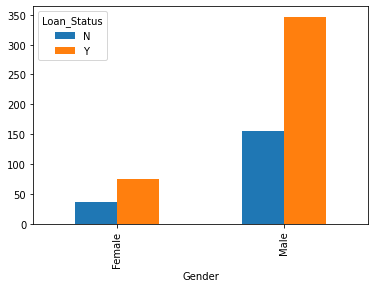

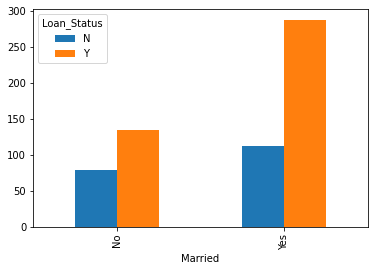

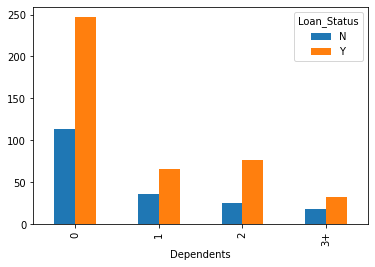

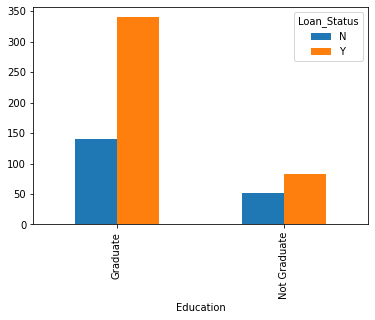

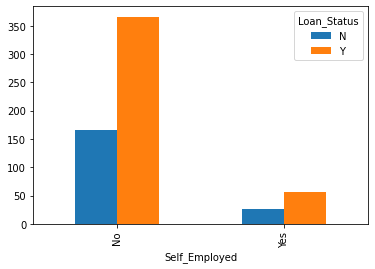

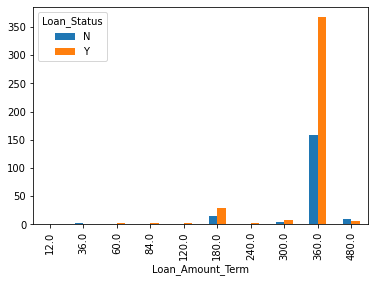

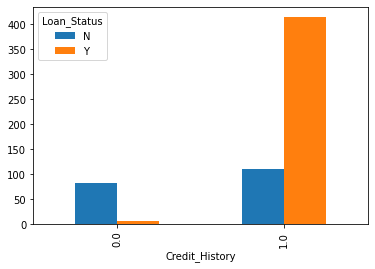

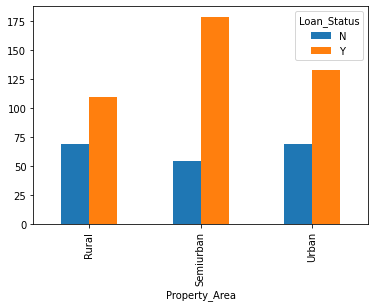

In [41]:
# Categorical vs Categorical
for i in ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']:
       pd.crosstab(data2[i], data2['Loan_Status']).plot.bar()

# Here, we need to check if ratio for each output category is similar or not.
"""
These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. 
If the ratio of bars is similar across all categories, then the two columns are not correlated. 
For example, look at the Gender Vs Loan_Status plot. 
The approved vs rejected ratio for Males is similar to Females, it means Gender does not affect the Loan approval!. 
Hence, these two variables are not correlated.

On the other hand, look at the Credit_History vs Loan_Status plot. 
The number of approvals are very high if Credit_History=1.0. 
It means Credit_History affects the loan approval! 
Hence, two columns are correlated with each other.
"""

In [42]:
# Categorical vs Categorical
from scipy.stats import chi2_contingency
for i in ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']:
       print(i, chi2_contingency(pd.crosstab(data2[i], data2['Loan_Status']))[1])

# If p_value is less than 0.05, then only we can pick that column
# For Married, Education Credit_History and Property_Area the value is less than 0.05, so can be picked.

Gender 0.7391461310869638
Married 0.029608580862582116
Dependents 0.3688663081366005
Education 0.04309962129357355
Self_Employed 1.0
Loan_Amount_Term 0.13058516348934335
Credit_History 3.4183499979091188e-40
Property_Area 0.0021360187811644937


# Encoding

In [43]:
data3=data2[['Married', 'Education', 'Credit_History', 'Property_Area', 'Loan_Status']]
 
# encoding of 'Married', 'Education' and 'Loan_Status'
data3['Married'].replace({'Yes':1, 'No':0}, inplace=True)
data3['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)
data3['Loan_Status'].replace({'Y':1, 'N':0}, inplace=True)

# one-hot encoding of 'Property_Area'
df2=pd.get_dummies(data3['Property_Area'])
data3=pd.concat([data3, df2], axis=1)
data3=data3.drop(['Property_Area'], axis=1)

# converting datatype
data3['Credit_History']=data3['Credit_History'].astype(int)

In [44]:
# Validate that data is ready for ML model creation
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Married         614 non-null    int64
 1   Education       614 non-null    int64
 2   Credit_History  614 non-null    int64
 3   Loan_Status     614 non-null    int64
 4   Rural           614 non-null    uint8
 5   Semiurban       614 non-null    uint8
 6   Urban           614 non-null    uint8
dtypes: int64(4), uint8(3)
memory usage: 21.1 KB


# Splitting input and output

In [45]:
x=data3[['Married', 'Education', 'Credit_History', 'Rural', 'Semiurban', 'Urban']]
y=data3[['Loan_Status']]

# Checking Imbalanced Dataset

In [46]:
print(y.value_counts())
# So, we have imbalanced dataset
# We have more data for Loan_Status as 'Y' and less for 'N'

Loan_Status
1              422
0              192
dtype: int64


In [47]:
# Handling imbalanced dataset using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority', random_state=7)
x_new, y_new = sm.fit_resample(x, y)

# Validation
print(y_new.value_counts())

Loan_Status
0              422
1              422
dtype: int64


Accuracy score without SMOTE = 0.83

Accuracy score with SMOTE = 0.71

We can see using SMOTE technique to balance out the imbalanced data is giving us a bad accuracy score, so we will skip this step. 

In [48]:
# Handling imbalanced dataset using SMOTE and Tomek Links
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
x_new, y_new = sm.fit_resample(x, y)

# Validation
print(y_new.value_counts())

Loan_Status
0              422
1              422
dtype: int64


Accuracy score without SMOTETomek = 0.83

Accuracy score with SMOTETomek = 0.71

We can see using SMOTETomek technique to balance out the imbalanced data is giving us a bad accuracy score, so we will skip this step. 

# Model Creation

In [49]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7, shuffle=True)

In [50]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
# Testing
import lazypredict
from lazypredict.Supervised import LazyClassifier

model=LazyClassifier(verbose=0, ignore_warnings=False)
models, prediction = model.fit(x_train, x_test, y_train, y_test)
models.head(5)

 14%|█▍        | 4/29 [00:00<00:01, 15.49it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


100%|██████████| 29/29 [00:01<00:00, 21.70it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.82,0.76,0.76,0.81,0.02
AdaBoostClassifier,0.83,0.74,0.74,0.81,0.12
LabelSpreading,0.83,0.74,0.74,0.81,0.04
SVC,0.83,0.74,0.74,0.81,0.02
RidgeClassifierCV,0.83,0.74,0.74,0.81,0.02


So, AdaBoostClassifier and XGBClassifier are showing the best results

In [52]:
##### AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
from sklearn import metrics
print("Accuracy based on Testing Data", metrics.accuracy_score(y_test, y_pred))

# Cross-validation score
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
from sklearn.model_selection import cross_val_score
score=cross_val_score(model, x, y, cv=10, scoring='accuracy')
print("Accuracy based on Complete Data", score.mean())

Accuracy based on Testing Data 0.8292682926829268
Accuracy based on Complete Data 0.8095716552088842


In [53]:
##### XGBoost Classifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
from sklearn import metrics
print("Accuracy based on Testing Data", metrics.accuracy_score(y_test, y_pred))

# Cross-validation score
from xgboost import XGBClassifier
model = XGBClassifier()
from sklearn.model_selection import cross_val_score
score=cross_val_score(model, x, y, cv=10, scoring='accuracy')
print("Accuracy based on Complete Data", score.mean())

Accuracy based on Testing Data 0.7967479674796748
Accuracy based on Complete Data 0.8095716552088842


Since, we have used only few columns for model creation, so only those values of only those columns will be taken as input in the final web-app.

# Creating final model and saving pickle

In [54]:
from xgboost import XGBClassifier
final_model = XGBClassifier()
final_model.fit(x, y)

import pickle
pickle.dump(final_model, open('/content/drive/MyDrive/ColabNotebooks/ML : Loan classification Prediction/model_loan_classifier.pkl', 'wb'))

References: [link](https://thinkingneuron.com/loan-classification-case-study/)

# Testing the pickle

In [86]:
input_data=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ML : Loan classification Prediction/Loan_Approval_Data.csv")
input_data1=input_data.head(1).drop('Loan_Status', axis=1)
#display(list(input_data1.values[0]))

model = pickle.load(open('/content/drive/MyDrive/ColabNotebooks/ML : Loan classification Prediction/model_loan_classifier.pkl', 'rb'))

output_test = np.array(input_data1).reshape(1,12)
output_test2= pd.DataFrame(output_test, columns=input_data.head(1).drop('Loan_Status', axis=1).columns)

output_test3=output_test2[['Married', 'Education', 'Credit_History', 'Property_Area']]
 
# encoding of 'Married', 'Education' and 'Loan_Status'
output_test3['Married'].replace({'Yes':1, 'No':0}, inplace=True)
output_test3['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)

# one-hot encoding of 'Property_Area'
output_test3['Rural']=1 if output_test3['Property_Area'].values[0]=='Rural' else 0
output_test3['Semiurban']=1 if output_test3['Property_Area'].values[0]=='Semiurban' else 0
output_test3['Urban']=1 if output_test3['Property_Area'].values[0]=='Urban' else 0

# dropping 'Property_Area'
output_test3=output_test3.drop('Property_Area', axis=1)

# converting datatype
output_test3['Credit_History']=output_test3['Credit_History'].astype(int)

if model.predict(output_test3):
  print('Loan is approved')
else:
  print('Loan is not approved')

Loan is approved
